In [375]:
#Importar librerias
import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

from sklearn.linear_model import LinearRegression
import seaborn as sns

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import scipy.stats as stats

In [377]:
#Cargar el dataset en un data frame
df = pd.read_csv('./Car details v3.csv')

In [379]:
#Exploración Inicial de los Datos
# Mostrar primeras filas del DataFrame
df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [381]:
# Información sobre tipos de datos y valores no nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [383]:
# Estadísticas descriptivas de variables numéricas
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


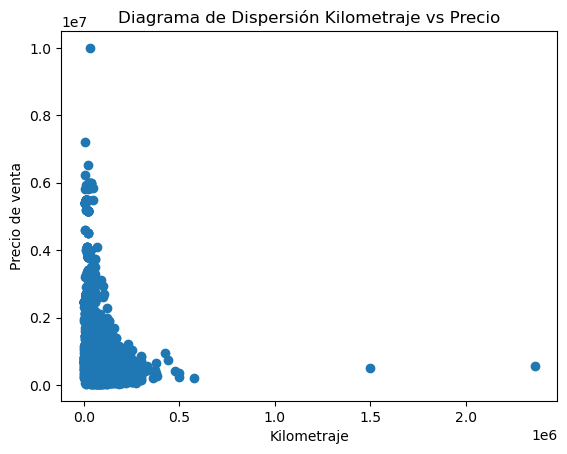

In [385]:
# Visualización de Datos Básica
# Diagrama de dispersión entre dos variables
plt.scatter(df['km_driven'], df['selling_price'])
plt.xlabel('Kilometraje')
plt.ylabel('Precio de venta')
plt.title('Diagrama de Dispersión Kilometraje vs Precio')
plt.show()


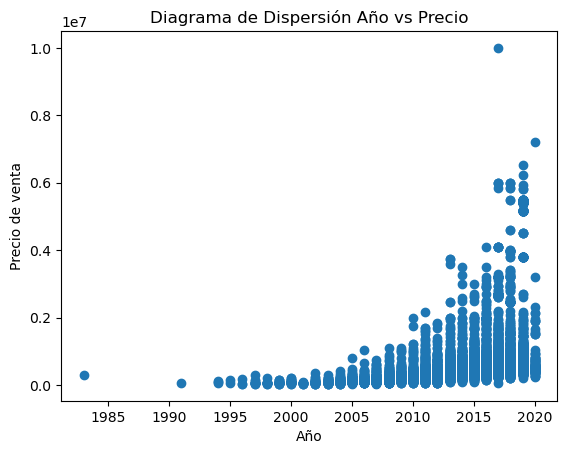

In [387]:
# Diagrama de dispersión entre dos variables
plt.scatter(df['year'], df['selling_price'])
plt.xlabel('Año')
plt.ylabel('Precio de venta')
plt.title('Diagrama de Dispersión Año vs Precio')
plt.show()

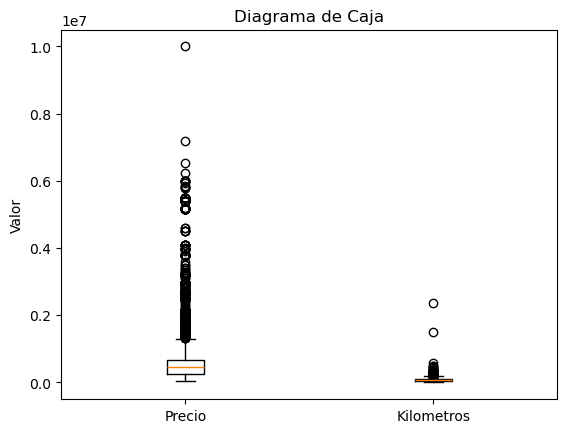

In [389]:
# Diagrama de caja para detectar valores atípicos
plt.boxplot([df['selling_price'], df['km_driven']], labels=['Precio', 'Kilometros'])
plt.ylabel('Valor')
plt.title('Diagrama de Caja')
plt.show()

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [391]:
# Manejo de Valores Atípicos, Faltantes y Duplicados
# Elimino valores atípicos de precio, kilometraje y año
df = df[df['selling_price']< 8000000]
df = df[df['km_driven']< 1500000]
df = df[df['year']> 1990]

In [393]:
# Eliminar filas duplicadas
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
df.info()

1202
<class 'pandas.core.frame.DataFrame'>
Index: 6922 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6922 non-null   object 
 1   year           6922 non-null   int64  
 2   selling_price  6922 non-null   int64  
 3   km_driven      6922 non-null   int64  
 4   fuel           6922 non-null   object 
 5   seller_type    6922 non-null   object 
 6   transmission   6922 non-null   object 
 7   owner          6922 non-null   object 
 8   mileage        6715 non-null   object 
 9   engine         6715 non-null   object 
 10  max_power      6718 non-null   object 
 11  torque         6714 non-null   object 
 12  seats          6715 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 757.1+ KB


In [395]:
# Verificar valores faltantes en el DataFrame
print(df.isna().sum())

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          207
engine           207
max_power        204
torque           208
seats            207
dtype: int64


In [397]:
# Verificar la cantidad de registros con al menos un valor nulo
filas_con_nulos = df.isnull().any(axis=1).sum()
print(filas_con_nulos)

208


In [399]:
#Realizar una copia del df con valores eliminados 
# Calcular el porcentaje de datos a eliminar
porcentaje = (filas_con_nulos / df.shape[0]) * 100
print(f'El porcentaje de datos a eliminar por contar con algún valor nulo es: {porcentaje:.2f}%')

df_ = df.dropna()
df_.info()

El porcentaje de datos a eliminar por contar con algún valor nulo es: 3.00%
<class 'pandas.core.frame.DataFrame'>
Index: 6714 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6714 non-null   object 
 1   year           6714 non-null   int64  
 2   selling_price  6714 non-null   int64  
 3   km_driven      6714 non-null   int64  
 4   fuel           6714 non-null   object 
 5   seller_type    6714 non-null   object 
 6   transmission   6714 non-null   object 
 7   owner          6714 non-null   object 
 8   mileage        6714 non-null   object 
 9   engine         6714 non-null   object 
 10  max_power      6714 non-null   object 
 11  torque         6714 non-null   object 
 12  seats          6714 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 734.3+ KB


In [401]:
# Inicio a imputar valores y a transformar para utilizar en el modelo de regresion

# La variable name contiene la marca y la serie de los vehiculos, pero hay 3 que en marca son dos palabras
# las reemplzo por una sola palabra

df_.loc[df_['name'] == 'Land Rover', 'name'] = 'Land_Rover'
df_.loc[df_['name'] == 'Maruti', 'name'] = 'Maruti_Suzuki'


In [403]:
# Preparar los datos para aplicar el modelo de regresión lineal
'''
Divido la columna name en dos (marca y linea)
Las columnas mileage, engine y max_power son valores compuestos por un número y unidad de medida, por lo cual
tomo solo los valores numpericos para los calculos.
'''
df_['marca'] = df_['name'].str.split().str[0]
df_['linea'] = df_['name'].str.split(n=1).str[1]
df_['consumo_kmpl'] = df_['mileage'].str.split().str[0]
df_['motor_cc'] = df_['engine'].str.split().str[0]
#df_sin_nulos['max_power_bhp'] = df_sin_nulos['max_power'].str.split().str[0]

# Elimino las columnas originales y quedo con las nuevas que se acabaron de crear con los datos numpericos
df_ = df_.drop(columns=['name', 'mileage','engine','max_power'])

C:\Users\GABRIEL\AppData\Local\Temp\ipykernel_8372\1434920928.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['marca'] = df_['name'].str.split().str[0]
C:\Users\GABRIEL\AppData\Local\Temp\ipykernel_8372\1434920928.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['linea'] = df_['name'].str.split(n=1).str[1]
C:\Users\GABRIEL\AppData\Local\Temp\ipykernel_8372\1434920928.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [405]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6714 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           6714 non-null   int64  
 1   selling_price  6714 non-null   int64  
 2   km_driven      6714 non-null   int64  
 3   fuel           6714 non-null   object 
 4   seller_type    6714 non-null   object 
 5   transmission   6714 non-null   object 
 6   owner          6714 non-null   object 
 7   torque         6714 non-null   object 
 8   seats          6714 non-null   float64
 9   marca          6714 non-null   object 
 10  linea          6714 non-null   object 
 11  consumo_kmpl   6714 non-null   object 
 12  motor_cc       6714 non-null   object 
dtypes: float64(1), int64(3), object(9)
memory usage: 734.3+ KB


In [409]:
# Inspecciono las variables categóricas para asignar valores numéricos 
print(df_['fuel'].unique())
print(df_['transmission'].unique())
print(df_['seller_type'].unique())
print(df_['owner'].unique())

['Diesel' 'Petrol' 'LPG' 'CNG']
['Manual' 'Automatic']
['Individual' 'Dealer' 'Trustmark Dealer']
['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']


In [317]:
# Creo un diccionario con las marcas existentes y sus indices + 1 para reemplazar sus valores
#dic_marca = {marca: f'{i+1}' for i, marca in enumerate(df_['marca'].unique())}
#print(dic_marca)

# Creo un diccionario con las clases fuel existentes y sus indices + 1 para reemplazar sus valores
dic_fuel = {fuel: f'{i+1}' for i, fuel in enumerate(df_['fuel'].unique())}
print(dic_fuel)

# Creo un diccionario con las clases de trasmision existentes y sus indices + 1 para reemplazar sus valores
dic_transm = {transm: f'{i+1}' for i, transm in enumerate(df_['transmission'].unique())}
print(dic_transm)

# Creo un diccionario con las cantidades de dueños existentes y sus indices + 1 para reemplazar sus valores
dic_owner = {owner: f'{i+1}' for i, owner in enumerate(df_['owner'].unique())}
dic_owner ['Test Drive Car'] = 0
print(dic_owner)

# Creo un diccionario con los tipos de vendedor existentes y sus indices + 1 para reemplazar sus valores
dic_seller = {seller: f'{i+1}' for i, seller in enumerate(df_['seller_type'].unique())}
print(dic_seller)

{'Diesel': '1', 'Petrol': '2', 'LPG': '3', 'CNG': '4'}
{'Manual': '1', 'Automatic': '2'}
{'First Owner': '1', 'Second Owner': '2', 'Third Owner': '3', 'Fourth & Above Owner': '4', 'Test Drive Car': 0}
{'Individual': '1', 'Dealer': '2', 'Trustmark Dealer': '3'}


In [411]:
# Reemplazo las categorias por los valores creados en cada diccionario
#df_['marca'] = df_['marca'].replace(dic_marca)
df_['fuel'] = df_['fuel'].replace(dic_fuel)
df_['transmission'] = df_['transmission'].replace(dic_transm)
df_['owner'] = df_['owner'].replace(dic_owner)
df_['seller_type'] = df_['seller_type'].replace(dic_seller)

In [413]:
# Utilizo el año del modelo para determinar los años de uso, creando esa columna

df_['años_uso'] = (2024 - df_['year'])
df_.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,torque,seats,marca,linea,consumo_kmpl,motor_cc,años_uso
0,2014,450000,145500,1,1,1,1,190Nm@ 2000rpm,5.0,Maruti,Swift Dzire VDI,23.4,1248,10
1,2014,370000,120000,1,1,1,2,250Nm@ 1500-2500rpm,5.0,Skoda,Rapid 1.5 TDI Ambition,21.14,1498,10
2,2006,158000,140000,2,1,1,3,"12.7@ 2,700(kgm@ rpm)",5.0,Honda,City 2017-2020 EXi,17.7,1497,18
3,2010,225000,127000,1,1,1,1,22.4 kgm at 1750-2750rpm,5.0,Hyundai,i20 Sportz Diesel,23.0,1396,14
4,2007,130000,120000,2,1,1,1,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti,Swift VXI BSIII,16.1,1298,17


In [415]:
# Convertir las nuevas columnas a tipo numérico
df_['owner'] = df_['owner'].astype(int)
df_['consumo_kmpl'] = df_['consumo_kmpl'].astype(float)
df_['motor_cc'] = df_['motor_cc'].astype(float)
#df_['marca'] = df_['marca'].astype(int)
df_['fuel'] = df_['fuel'].astype(int)
df_['seller_type'] = df_['seller_type'].astype(int)
df_['transmission'] = df_['transmission'].astype(int)

df_.info()
# Estadísticas descriptivas de variables numéricas
print(df_.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 6714 entries, 0 to 8125
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           6714 non-null   int64  
 1   selling_price  6714 non-null   int64  
 2   km_driven      6714 non-null   int64  
 3   fuel           6714 non-null   int32  
 4   seller_type    6714 non-null   int32  
 5   transmission   6714 non-null   int32  
 6   owner          6714 non-null   int32  
 7   torque         6714 non-null   object 
 8   seats          6714 non-null   float64
 9   marca          6714 non-null   object 
 10  linea          6714 non-null   object 
 11  consumo_kmpl   6714 non-null   float64
 12  motor_cc       6714 non-null   float64
 13  años_uso       6714 non-null   int64  
dtypes: float64(3), int32(4), int64(4), object(3)
memory usage: 681.9+ KB
              year  selling_price      km_driven         fuel  seller_type  \
count  6714.000000   6.714000e+03    6714.

## 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

En este caso de estudio, Selling_price es el valor a predecir, las variables a utilizar serán: marca, km_driven', 'fuel', 'transmission', 'motor_cc', 'años_uso con las cuales se espera ajustar el modelo, sin embargo, como el modelo de regresión lineal solo acepta valores numéricos se deben ajustar la variable categórica marca como dummies y de esta forma obtener mejores resultados en el modelo

In [448]:
# Datos de relevancia para el modelo, se ajusta sólo con la variables a utilizar

df_model = df_.drop(columns=['torque', 'linea', 'year', 'seats', 'consumo_kmpl', 'owner', 'seller_type'])

print(df_model.head(10))

   selling_price  km_driven  fuel  transmission    marca  motor_cc  años_uso
0         450000     145500     1             1   Maruti    1248.0        10
1         370000     120000     1             1    Skoda    1498.0        10
2         158000     140000     2             1    Honda    1497.0        18
3         225000     127000     1             1  Hyundai    1396.0        14
4         130000     120000     2             1   Maruti    1298.0        17
5         440000      45000     2             1  Hyundai    1197.0         7
6          96000     175000     3             1   Maruti    1061.0        17
7          45000       5000     2             1   Maruti     796.0        23
8         350000      90000     1             1   Toyota    1364.0        13
9         200000     169000     1             1     Ford    1399.0        11


In [450]:
# Convertir las variables categóricas en variables dummy para el entrenamiento
df_dummies = pd.get_dummies(df_model, dtype=int, drop_first=True)
# Verifico la creacion de las columnas dummies
df_dummies

,selling_price,km_driven,fuel,transmission,motor_cc,años_uso,marca_Ashok,marca_Audi,marca_BMW,marca_Chevrolet,...,marca_Mercedes-Benz,marca_Mitsubishi,marca_Nissan,marca_Opel,marca_Renault,marca_Skoda,marca_Tata,marca_Toyota,marca_Volkswagen,marca_Volvo
0,450000,145500,1,1,1248.0,10,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,370000,120000,1,1,1498.0,10,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,158000,140000,2,1,1497.0,18,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,225000,127000,1,1,1396.0,14,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,130000,120000,2,1,1298.0,17,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,260000,50000,2,1,998.0,11,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8122,475000,80000,1,1,1396.0,10,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8123,320000,110000,2,1,1197.0,11,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8124,135000,119000,1,1,1493.0,17,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [423]:
df_dummies.columns

Index(['selling_price', 'km_driven', 'fuel', 'transmission', 'motor_cc',
       'años_uso', 'marca_Ashok', 'marca_Audi', 'marca_BMW', 'marca_Chevrolet',
       'marca_Daewoo', 'marca_Datsun', 'marca_Fiat', 'marca_Force',
       'marca_Ford', 'marca_Honda', 'marca_Hyundai', 'marca_Isuzu',
       'marca_Jaguar', 'marca_Jeep', 'marca_Kia', 'marca_Land', 'marca_Lexus',
       'marca_MG', 'marca_Mahindra', 'marca_Maruti', 'marca_Mercedes-Benz',
       'marca_Mitsubishi', 'marca_Nissan', 'marca_Opel', 'marca_Renault',
       'marca_Skoda', 'marca_Tata', 'marca_Toyota', 'marca_Volkswagen',
       'marca_Volvo'],
      dtype='object')

## 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

## Modelo
Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

In [452]:
# Se crean variables X y Y para almacenar la información del entrenamiento

X = df_dummies.drop('selling_price',axis=1) # Al quitar la variable a predecir, quedan marca, km_driven', 'fuel', 'transmission', 'motor_cc', 'años_uso  
Y = df_dummies['selling_price'] # Se cargan los datos de train con los datos de la la columna selling_price

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state= 0)

In [454]:
print (X_train)

      km_driven  fuel  transmission  motor_cc  años_uso  marca_Ashok  \
2782      50000     1             1    2498.0        12            0   
6736     120000     2             1     796.0        10            0   
5639      50000     2             1    1197.0        10            0   
4541     120000     2             1    1497.0        14            0   
4625      90000     1             1    1248.0        13            0   
...         ...   ...           ...       ...       ...          ...   
5868     175000     1             1    1248.0        12            0   
3751      70000     3             1    1086.0        12            0   
1891     100000     2             1     796.0        18            0   
2948     100000     1             1    2523.0        19            0   
3098      45000     1             1    1498.0         7            0   

      marca_Audi  marca_BMW  marca_Chevrolet  marca_Daewoo  ...  \
2782           0          0                0             0  ...   
6

In [456]:
print (Y_train)

2782    700000
6736    206000
5639    434999
4541    350000
4625    240000
         ...  
5868    325000
3751    185000
1891    150000
2948    150000
3098    725000
Name: selling_price, Length: 5371, dtype: int64


## 5. Entrenamiento del modelo de Regresión Lineal

In [458]:
# Entrenar el modelo configurando los diferentes hiperparámetros

# Construir el modelo de regresión lineal 

modelo = LinearRegression() 

modelo.fit (X_train , Y_train)   

# Crea el modelo de prediccion
prediccion = modelo.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [460]:
print (Y_test)

1546    229999
3641    229999
2479     65000
7830    235000
7527    280000
         ...  
2707    465000
3701    280000
4104    475000
7459    540000
6876    400000
Name: selling_price, Length: 1343, dtype: int64


In [462]:
print (prediccion)

[ 345530.32875218 -312223.19922522  -30736.58449103 ...  457943.15897349
  839660.80349975  492306.8908143 ]


## 6 Evaluación del modelo de regresion creado

In [464]:
# Evaluar el desempeño del modelo
# Calcular las métricas de evaluación

r2 = r2_score(Y_test, prediccion) # Coeficiente de determinación R²
mae = mean_absolute_error(Y_test, prediccion)  # Error Absoluto Medio
mse = mean_squared_error(Y_test, prediccion)   # Error Cuadrático Medio
rmse = np.sqrt(mse)                         # Raíz del Error Cuadrático Medio

# Imprimir las métricas
print(f'R² (Coeficiente de determinación): {r2}')
print(f'Error Absoluto Medio (MAE): {mae}')

R² (Coeficiente de determinación): 0.6393217475950774
Error Absoluto Medio (MAE): 155307.48024618032


## 7 Graficas del modelo

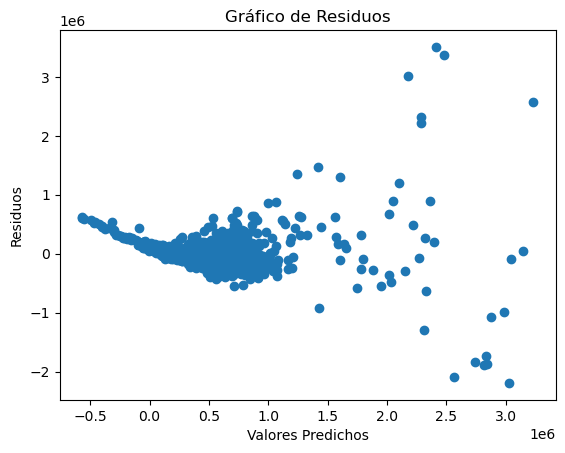

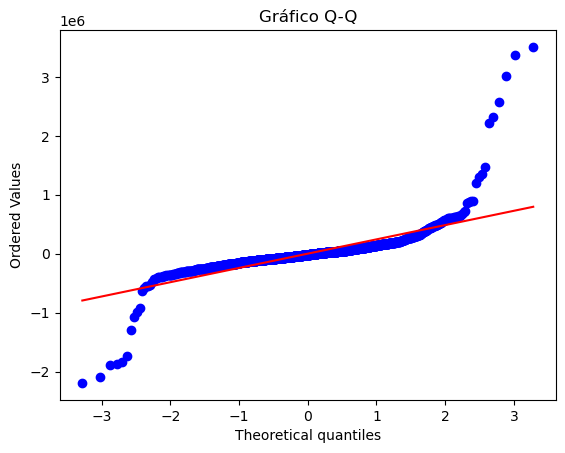

In [466]:
# Gráfico de Residuos
residuos = Y_test - prediccion
plt.scatter(prediccion, residuos)
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')
plt.show()

# Gráfico Q-Q
stats.probplot(residuos, dist="norm", plot=plt)
plt.title('Gráfico Q-Q')
plt.show()

In [441]:
X.columns

Index(['km_driven', 'fuel', 'transmission', 'motor_cc', 'años_uso',
       'marca_Ashok', 'marca_Audi', 'marca_BMW', 'marca_Chevrolet',
       'marca_Daewoo', 'marca_Datsun', 'marca_Fiat', 'marca_Force',
       'marca_Ford', 'marca_Honda', 'marca_Hyundai', 'marca_Isuzu',
       'marca_Jaguar', 'marca_Jeep', 'marca_Kia', 'marca_Land', 'marca_Lexus',
       'marca_MG', 'marca_Mahindra', 'marca_Maruti', 'marca_Mercedes-Benz',
       'marca_Mitsubishi', 'marca_Nissan', 'marca_Opel', 'marca_Renault',
       'marca_Skoda', 'marca_Tata', 'marca_Toyota', 'marca_Volkswagen',
       'marca_Volvo'],
      dtype='object')

In [445]:
# Predecir precio para un nuevo valor
''''km_driven', 'fuel', 'transmission', 'motor_cc', 'años_uso',
       'marca_Ambassador', 'marca_Ashok', 'marca_Audi', 'marca_BMW',
       'marca_Chevrolet', 'marca_Daewoo', 'marca_Datsun', 'marca_Fiat',
       'marca_Force', 'marca_Ford', 'marca_Honda', 'marca_Hyundai',
       'marca_Isuzu', 'marca_Jaguar', 'marca_Jeep', 'marca_Kia', 'marca_Land',
       'marca_Lexus', 'marca_MG', 'marca_Mahindra', 'marca_Maruti',
       'marca_Mercedes-Benz', 'marca_Mitsubishi', 'marca_Nissan', 'marca_Opel',
       'marca_Renault', 'marca_Skoda', 'marca_Tata', 'marca_Toyota',
       'marca_Volkswagen', 'marca_Volvo'''

# Vehículo marca Maruti, km 145500, fuel 1, transmission 1, motor_cc 1248

nuevo_X = np.array([[145500, 1, 1, 1248, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])  # Nuevos valores
precioPredicho = modelo.predict(nuevo_X)
print(precioPredicho)


[361436.99474511]


C:\Users\GABRIEL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
